In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Excel files
dot_filepath = '../../data/output/backtest_Close_DOT.xlsx'
dot_df = pd.read_excel(dot_filepath)
sol_filepath = '../../data/output/backtest_Close_SOL.xlsx'
sol_df = pd.read_excel(sol_filepath)
eth_filepath = '../../data/output/backtest_Close_ETH.xlsx'
eth_df = pd.read_excel(eth_filepath)
ada_filepath = '../../data/output/backtest_Close_ADA.xlsx'
ada_df = pd.read_excel(ada_filepath)

# Extracting values into lists
eth_money_evolution = eth_df['valeur_portefeuille'].tolist()
eth_money_evolution_buy_and_hold = eth_df['valeur_portefeuille_buy_and_hold'].tolist()
btc_money_evolution = dot_df['valeur_portefeuille'].tolist()
btc_money_evolution_buy_and_hold = dot_df['valeur_portefeuille_buy_and_hold'].tolist()
ada_money_evolution = ada_df['valeur_portefeuille'].tolist()
ada_money_evolution_buy_and_hold = ada_df['valeur_portefeuille_buy_and_hold'].tolist()
sol_money_evolution = sol_df['valeur_portefeuille'].tolist()
sol_money_evolution_buy_and_hold = sol_df['valeur_portefeuille_buy_and_hold'].tolist()

# Summing the two portfolios
money_evolution = []
money_evolution_buy_and_hold = []
for i in range(len(btc_money_evolution)):
    money_evolution.append(btc_money_evolution[i] + eth_money_evolution[i] + ada_money_evolution[i] + sol_money_evolution[i])
    money_evolution_buy_and_hold.append(btc_money_evolution_buy_and_hold[i] + eth_money_evolution_buy_and_hold[i] + ada_money_evolution_buy_and_hold[i] + sol_money_evolution_buy_and_hold[i])

In [2]:
## Compute % growth for both evolutions
growth_buy_and_hold = (money_evolution_buy_and_hold[-1] - money_evolution_buy_and_hold[0]) / money_evolution_buy_and_hold[0]
growth = (money_evolution[-1] - money_evolution[0]) / money_evolution[0]
print(f'Buy and hold growth: {growth_buy_and_hold*100:.2f}')
print(f'Applied strategy growth: {growth*100:.2f}')

Buy and hold growth: -33.98
Applied strategy growth: 15.89


In [3]:
## Compute sharpe ratio
TRADING_DAYS_PER_YEAR = 365
risk_free_rate = 0.01 / TRADING_DAYS_PER_YEAR
df = pd.DataFrame(money_evolution, columns=['Investment_Value'])
df_buy_and_hold = pd.DataFrame(money_evolution_buy_and_hold, columns=['Investment_Value'])
df['daily_returns'] = df['Investment_Value'].pct_change(1)
df_buy_and_hold['daily_returns'] = df_buy_and_hold['Investment_Value'].pct_change(1)
excess_returns = df['daily_returns'] - risk_free_rate
excess_returns_buy_and_hold = df_buy_and_hold['daily_returns'] - risk_free_rate
sharpe_ratio = excess_returns.mean() / excess_returns.std()
sharpe_ratio_buy_and_hold = excess_returns_buy_and_hold.mean() / excess_returns_buy_and_hold.std()
sharpe_ratio_annualized = sharpe_ratio * np.sqrt(TRADING_DAYS_PER_YEAR)
sharpe_ratio_annualized_buy_and_hold = sharpe_ratio_buy_and_hold * np.sqrt(TRADING_DAYS_PER_YEAR)
print(f'Sharpe ratio: {sharpe_ratio_annualized:.2f}')
print(f'Sharpe ratio buy and hold: {sharpe_ratio_annualized_buy_and_hold:.2f}')

Sharpe ratio: 0.85
Sharpe ratio buy and hold: -0.75


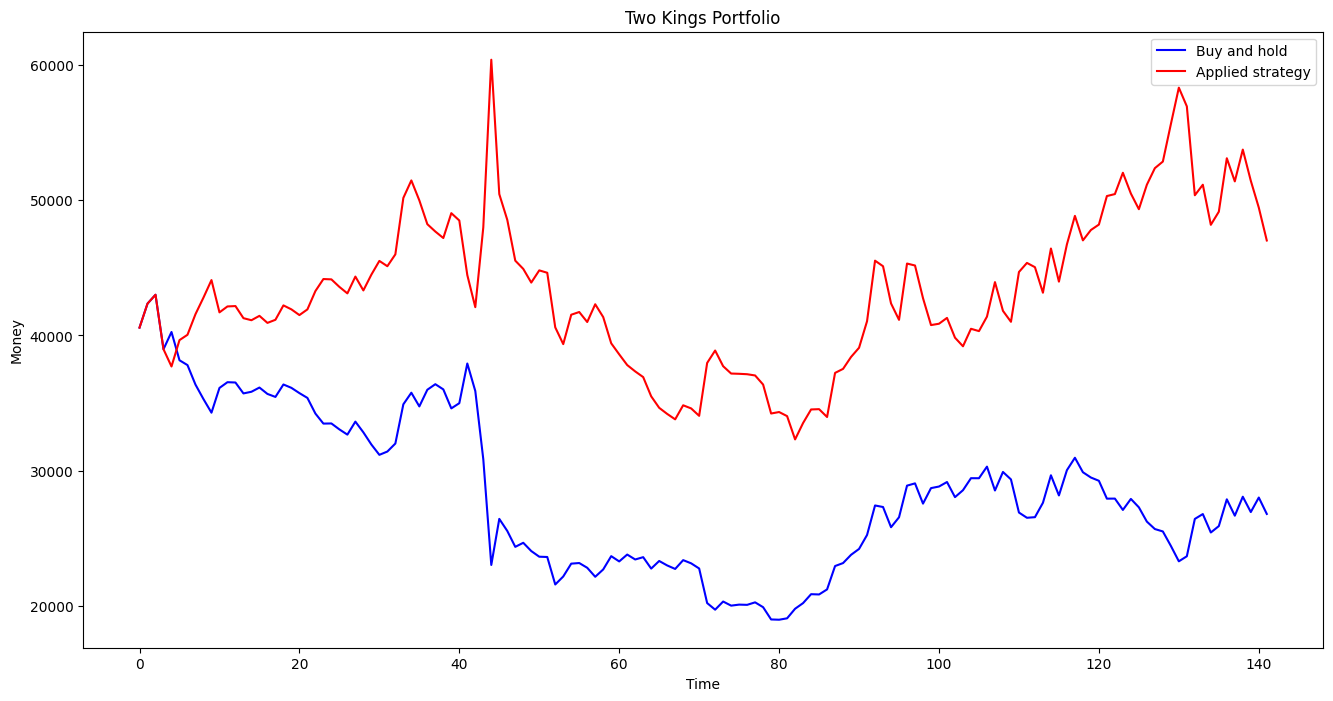

In [4]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 1, 1)
plt.plot(money_evolution_buy_and_hold, label='Buy and hold', color='blue')
plt.plot(money_evolution, label='Applied strategy', color='red')
plt.title(f'Green Portfolio')
plt.ylabel('Money')
plt.xlabel('Time')
plt.legend()